In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

from allen_v1dd.client import OPhysClient, EMClient
from allen_v1dd.stimulus_analysis import analysis_tools as at
from allen_v1dd.stimulus_analysis.analysis_tools import iter_plane_groups
at.set_stylesheet()

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
at.set_analysis_file("/Users/chase/Desktop/stimulus_analyses_v1.h5")
at.set_included_mice([409828])
at.set_included_columns([1])

In [2]:
em_client = EMClient()

In [4]:
coreg_df = em_client.get_coregistration_table()
coreg_df.head()

,index,id,created,valid,target_id,session,scan_idx,unit_id,field,residual,...,ophys_volume,ophys_session_id,ophys_plane,ophys_roi,roi,position_microns,axon_proof_status,axon_proof_complete,dendrite_proof_status,dendrite_proof_complete
0,0,1,2023-04-14 22:08:40.446962+00:00,t,276266,1,3,117,1,NaN,...,3,M409828_13,0,117,M409828_13_0_117,"[778.7521791075498, 227.97907876189072, 29.657...",submitted,True,not_started,True
1,1,2,2023-04-14 22:08:40.447864+00:00,t,276140,1,3,75,1,NaN,...,3,M409828_13,0,75,M409828_13_0_75,"[816.1188928555765, 236.2662880987557, 17.5425...",submitted,True,submitted,True
2,2,3,2023-04-14 22:08:40.448713+00:00,t,290027,1,3,26,1,NaN,...,3,M409828_13,0,26,M409828_13_0_26,"[874.2243220704512, 248.26178219838565, -104.6...",not_started,False,not_started,False
3,3,4,2023-04-14 22:08:40.449580+00:00,t,365414,1,3,163,1,NaN,...,3,M409828_13,0,163,M409828_13_0_163,"[933.6856808451048, 252.00293174161231, -63.72...",not_started,False,not_started,False
4,4,5,2023-04-14 22:08:40.450423+00:00,t,365704,1,3,31,1,NaN,...,3,M409828_13,0,31,M409828_13_0_31,"[979.6986711301596, 251.2837669970616, -46.357...",not_started,False,not_started,False


In [8]:
ophys_plane_to_depth = {}
for group in iter_plane_groups():
    ophys_plane_to_depth[(group.attrs["session_id"], group.attrs["plane"])] = group.attrs["plane_depth_microns"]

In [11]:
coreg_df["ophys_depth"] = coreg_df.apply(lambda row: ophys_plane_to_depth.get((row["ophys_session_id"], row["ophys_plane"]), -1), axis=1)

(67.49999999999999, 782.5, 16.249999999999964, 758.7500000000001)

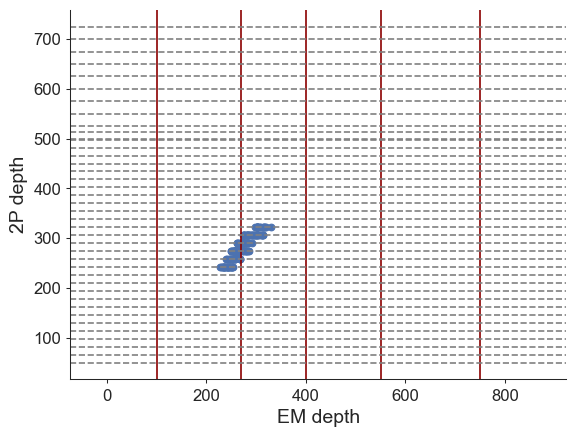

In [25]:
em_depth = coreg_df.position_microns.apply(lambda x: x[1])
ophys_depth = coreg_df.ophys_depth
plt.scatter(em_depth, ophys_depth)
# plt.axis("equal")
plt.xlabel("EM depth")
plt.ylabel("2P depth")

for depth in em_client.layer_separations:
    plt.axvline(x=depth, color="darkred")

for depth in ophys_plane_to_depth.values():
    plt.axhline(y=depth, color="gray", linestyle="dashed")

plt.xlim(200, 400)
plt.ylim(200, 400)
plt.axis("equal")

In [ ]:
def ophys_depth_to_layer(depth):
    if depth < 250:
        return "2/3"
    elif depth < 300:
        return "2/3/4 boundary"
    elif depth < 475:
        return "4"
    return "unknown"

In [24]:
ophys_plane_to_depth

{('M409828_11', 0): 50,
 ('M409828_11', 1): 66,
 ('M409828_11', 2): 82,
 ('M409828_11', 3): 98,
 ('M409828_11', 4): 114,
 ('M409828_11', 5): 130,
 ('M409828_12', 0): 146,
 ('M409828_12', 1): 162,
 ('M409828_12', 2): 178,
 ('M409828_12', 3): 194,
 ('M409828_12', 4): 210,
 ('M409828_12', 5): 226,
 ('M409828_13', 0): 242,
 ('M409828_13', 1): 258,
 ('M409828_13', 2): 274,
 ('M409828_13', 3): 290,
 ('M409828_13', 4): 306,
 ('M409828_13', 5): 322,
 ('M409828_14', 0): 338,
 ('M409828_14', 1): 354,
 ('M409828_14', 2): 370,
 ('M409828_14', 3): 386,
 ('M409828_14', 4): 402,
 ('M409828_14', 5): 418,
 ('M409828_15', 0): 434,
 ('M409828_15', 1): 450,
 ('M409828_15', 2): 466,
 ('M409828_15', 3): 482,
 ('M409828_15', 4): 498,
 ('M409828_15', 5): 514,
 ('M409828_16', 0): 500,
 ('M409828_17', 0): 525,
 ('M409828_18', 0): 550,
 ('M409828_19', 0): 575,
 ('M409828_1a', 0): 600,
 ('M409828_1b', 0): 625,
 ('M409828_1c', 0): 650,
 ('M409828_1d', 0): 675,
 ('M409828_1e', 0): 700,
 ('M409828_1f', 0): 725}